# Face Detection Crop Test

`OpenCV`로 Face Detection과 Crop을 테스트한 기록입니다.

## References

* `face_detection_test.ipynb` 파일
* [Python 과 OpenCV 기초 (scaling, rotating, cropping)](http://newpower.tistory.com/118)


## Source of Data

* [네이버 영화: 다크나이트](https://movie.naver.com/movie/bi/mi/photoView.nhn?code=62586)
* [OpenCV xml data](https://github.com/informramiz/Face-Detection-OpenCV)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

`cv2`는 이미지를 기본으로 `rgb`로 읽지 않고 `bgr`로 읽는다.  
`cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)`로 따로 RGB로 돌려 줄 수 있다.

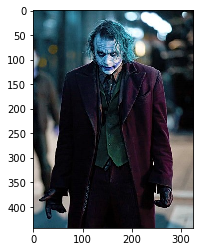

In [2]:
img = cv2.imread("./joker.jpg")
plt.imshow(img)

In [3]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_alt.xml')

In [4]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          

    #go over list of faces and draw them as rectangles on original colored img
    result = None
    for (x, y, w, h) in faces:
        result = (x, y, w, h)
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return img_copy, result

(443, 326, 3) 113 61 77 77


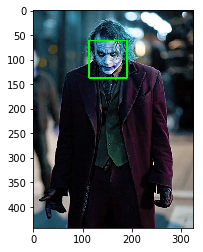

In [5]:
img_face, (x, y, w, h) = detect_faces(haar_face_cascade, img)
print(img_face.shape, x, y, w, h)
plt.imshow(img_face)

### Cropping

(77, 77, 3)


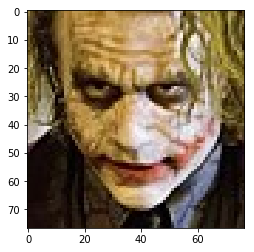

In [8]:
img_cropped = img[y:y+h, x:x+w]
img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB)
print(img_cropped.shape)
plt.imshow(img_cropped)

### resizing

(32, 32, 3)


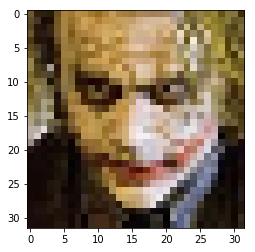

In [11]:
img_resize = cv2.resize(img_cropped, (32, 32))
print(img_resize.shape)
plt.imshow(img_resize)

### grayscale

(32, 32)


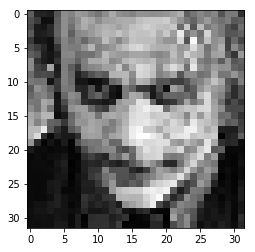

In [14]:
img_gray = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
print(img_gray.shape)
plt.imshow(img_gray, cmap=plt.cm.binary_r)

In [17]:
img_gray

array([[ 90,  34,  34, ..., 115, 115,  46],
       [ 77,  56,  14, ..., 119,  85,  92],
       [ 69,  25,  21, ...,  81,  64, 107],
       ...,
       [ 16,  21,  21, ...,  24,   9,  25],
       [ 15,  17,  18, ...,  25,   8,  46],
       [ 16,  14,  17, ...,  24,  13,  40]], dtype=uint8)